In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [124]:
# Split a column into 2 columns, split a size into number + metrics
def split_cols(df, col):
    new_col = pd.DataFrame(df[col].str.extract(r'([0-9]+)([a-z]+)', expand=True))
    df[[col, 'metrics']] = new_col

In [130]:
actress_data = pd.read_csv('datasets/actress.csv', index_col = 'id')

actress_data.insert(9, 'metrics', ['cm' for i in range(len(actress_data))], True)

feature_names = ['height', 'bust', 'waist', 'hips']

for feature in feature_names:
    split_cols(actress_data, feature)
actress_data[feature_names] = actress_data[feature_names].astype('float32')
actress_data.head()

,name,imgurl,birthday,height,cup_size,bust,waist,hips,birthplace,metrics,hobby
id,,,,,,,,,,,
1,波多野結衣,https://pics.javhoo.net/2016/02/2jv_a-1.jpg,1988-05-24,163.0,D,88.0,59.0,85.0,京都府,cm,ゲーム
2,上原亜衣,https://pics.javhoo.net/2016/02/2ny_a.jpg,1992-11-12,NaN,E,83.0,57.0,82.0,NaN,cm,NaN
3,北条麻妃,https://pics.javhoo.net/2016/02/2lk.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,風間ゆみ,https://pics.javhoo.net/2016/02/2t_a.jpg,1979-02-22,160.0,F,93.0,60.0,90.0,東京都,cm,水泳
5,JULIA,https://pics.javhoo.net/2016/02/2de_a.jpg,1987-05-25,158.0,J,101.0,55.0,84.0,NaN,cm,"自分磨き,簿記二級"


,height,bust,waist,hips
id,,,,
1,163.0,88.0,59.0,85.0
4,160.0,93.0,60.0,90.0
5,158.0,101.0,55.0,84.0
6,168.0,101.0,59.0,92.0
7,154.0,84.0,58.0,83.0


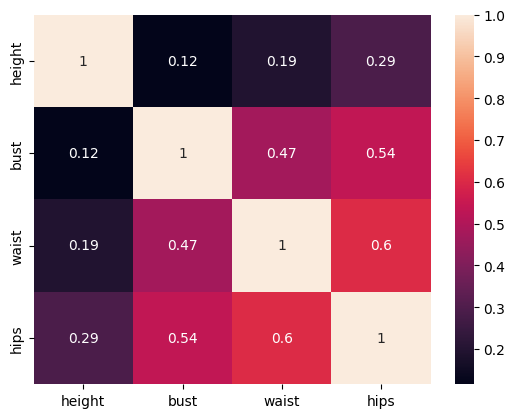

In [163]:
heatmap_data = actress_data.drop(['name', 'imgurl', 'birthday', 'birthplace', 'metrics', 'hobby'], axis=1)
sns.heatmap(data=heatmap_data.corr(), annot=True)
heatmap_data.head()

In [131]:
# Read the data and drop all the rows with missing values in feature_names columns
X_full = actress_data
X_full.dropna(axis=0, subset=['cup_size'], inplace=True)
X_full.dropna(axis=0, subset=['height'], inplace=True)
X_full.dropna(axis=0, subset=['bust'], inplace=True)
X_full.dropna(axis=0, subset=['waist'], inplace=True)
X_full.dropna(axis=0, subset=['hips'], inplace=True)

# Target
y = X_full.cup_size
X_full.drop(['cup_size'], axis=1, inplace=True)
X = X_full.select_dtypes(exclude=['object'])

# # Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [143]:
X_train.head()

,height,bust,waist,hips
id,,,,
7760,159.0,87.0,58.0,86.0
1091,154.0,87.0,58.0,83.0
1957,161.0,97.0,60.0,92.0
5362,166.0,90.0,60.0,92.0
2964,155.0,84.0,65.0,90.0


In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
random_forest_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [168]:
from sklearn.metrics import accuracy_score

rf_prediction = random_forest_model.predict(X_valid)
knn_prediction = knn_model.predict(X_valid)

print("Accuracy of random forest model: ", accuracy_score(y_valid, rf_prediction))
print("Accuracy of knn model: ", accuracy_score(y_valid, knn_prediction))

Accuracy of random forest model:  0.43914473684210525
Accuracy of knn model:  0.35526315789473684
